<a href="https://colab.research.google.com/github/192110469/Identification-of-Pest-Infected-Coconut-Leaves/blob/main/paper_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
data_dir = '/content/drive/MyDrive/datasets for coconut leaves'
categories = ['healthy leaves','pest infected']
images = []
labels = []
for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img_name in os.listdir(path):
        img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (100, 100))  # Resize the image to a consistent size
        images.append(img)
        labels.append(class_num)

images = np.array(images)
labels = np.array(labels)

num_iterations = 25
accuracy_history1 = []
for iteration in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42 + iteration)  # Change the random_state in each iteration

    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_flat)
    X_test_scaled = scaler.transform(X_test_flat)

    n_components = 50
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Initialize and train an SVM classifier
    svm_classifier = SVC(kernel='linear', C=1.0, random_state=42 + iteration)
    svm_classifier.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = svm_classifier.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_history1.append(accuracy)
    print(f"Iteration {iteration+1}, Accuracy: {accuracy * 100:.2f}%")

KeyboardInterrupt: 

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

data_dir = '/content/drive/MyDrive/datasets for coconut leaves'
categories = ['healthy leaves', 'pest infected']
images = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)

    for img_name in os.listdir(path):
        img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (100, 100))  # Resize the image to a consistent size
        images.append(img)
        labels.append(class_num)

images = np.array(images)
labels = np.array(labels)

num_iterations = 25
accuracy_history = []

for iteration in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42 + iteration)

    # LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Reshape data for LSTM input
    X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
    X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

    # Train the LSTM model
    model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

    # Predict on the test set
    y_pred_proba = model.predict(X_test_lstm)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_history.append(accuracy)
    print(f"Iteration {iteration + 1}, Accuracy: {accuracy * 100:.2f}%")


Epoch 1/10
42/42 [==============================] - 5s 64ms/step - loss: 0.6837 - accuracy: 0.5924 - val_loss: 0.6583 - val_accuracy: 0.6179
Epoch 2/10
42/42 [==============================] - 2s 50ms/step - loss: 0.6220 - accuracy: 0.6545 - val_loss: 0.6639 - val_accuracy: 0.5970
Epoch 3/10
42/42 [==============================] - 2s 53ms/step - loss: 0.6008 - accuracy: 0.6702 - val_loss: 0.6597 - val_accuracy: 0.6149
Epoch 4/10
42/42 [==============================] - 4s 85ms/step - loss: 0.6011 - accuracy: 0.6619 - val_loss: 0.6508 - val_accuracy: 0.6060
Epoch 5/10
42/42 [==============================] - 2s 59ms/step - loss: 0.5904 - accuracy: 0.6776 - val_loss: 0.6375 - val_accuracy: 0.6269
Epoch 6/10
42/42 [==============================] - 2s 47ms/step - loss: 0.5893 - accuracy: 0.6851 - val_loss: 0.6396 - val_accuracy: 0.5970
Epoch 7/10
42/42 [==============================] - 2s 51ms/step - loss: 0.5775 - accuracy: 0.6769 - val_loss: 0.6374 - val_accuracy: 0.6299
Epoch 8/10
42

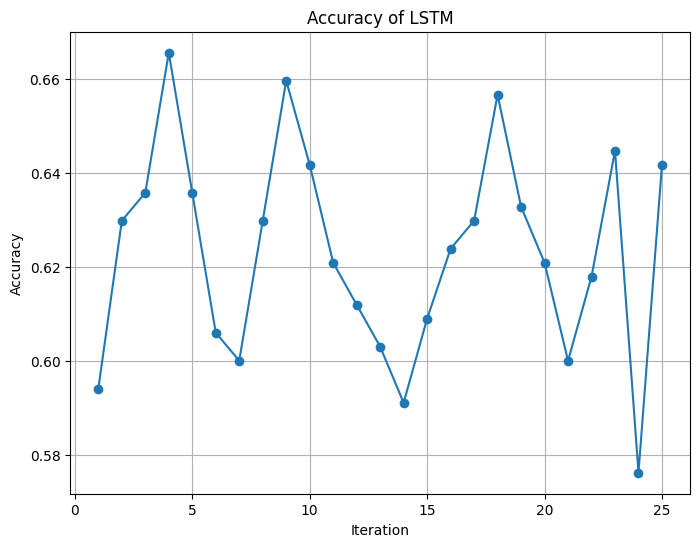

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), accuracy_history, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy of LSTM')
plt.grid(True)
plt.show()

In [ ]:
num_iterations=25
iterations = range(1, num_iterations + 1)
plt.plot(iterations, accuracy_history1, label='NPCA')
plt.plot(iterations, accuracy_history, label='LSTM')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison : NPCA vs. LSTM')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
# Function to run PCA and SVM
def run_pca_svm(images, labels, num_iterations=25, n_components=50):
    accuracy_history = []

    for iteration in range(num_iterations):
        X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42 + iteration)

        X_train_flat = X_train.reshape(X_train.shape[0], -1)
        X_test_flat = X_test.reshape(X_test.shape[0], -1)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_flat)
        X_test_scaled = scaler.transform(X_test_flat)

        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        svm_classifier = SVC(kernel='linear', C=1.0, random_state=42 + iteration)
        svm_classifier.fit(X_train_pca, y_train)

        y_pred = svm_classifier.predict(X_test_pca)

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_history.append(accuracy)
        print(f"PCA Iteration {iteration + 1}, Accuracy: {accuracy * 100:.2f}%")

    return accuracy_history

# Function to run LSTM
def run_lstm(images, labels, num_iterations=25):
    accuracy_history = []

    for iteration in range(num_iterations):
        X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42 + iteration)

        model = Sequential()
        model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
        X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

        model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

        y_pred_proba = model.predict(X_test_lstm)
        y_pred = (y_pred_proba > 0.5).astype(int)

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_history.append(accuracy)
        print(f"LSTM Iteration {iteration + 1}, Accuracy: {accuracy * 100:.2f}%")

    return accuracy_history

# Load and preprocess the dataset
data_dir = '/content/drive/MyDrive/datasets for coconut leaves'
categories = ['healthy leaves', 'pest infected']
images = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)

    for img_name in os.listdir(path):
        img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (100, 100))  # Resize the image to a consistent size
        images.append(img)
        labels.append(class_num)

images = np.array(images)
labels = np.array(labels)

# Run PCA and SVM
pca_svm_accuracy = run_pca_svm(images, labels)

# Run LSTM
lstm_accuracy = run_lstm(images, labels)

# Plot the comparison graph
iterations = range(1, num_iterations + 1)
plt.plot(iterations, pca_svm_accuracy, label='NPCA')
plt.plot(iterations, lstm_accuracy, label='LSTM')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison : NPCA vs. LSTM')
plt.legend()
plt.show()


PCA Iteration 1, Accuracy: 80.90%
PCA Iteration 2, Accuracy: 82.39%
PCA Iteration 3, Accuracy: 84.78%
PCA Iteration 4, Accuracy: 82.39%
PCA Iteration 5, Accuracy: 83.28%
PCA Iteration 6, Accuracy: 81.49%
PCA Iteration 7, Accuracy: 81.19%
PCA Iteration 8, Accuracy: 79.70%
PCA Iteration 9, Accuracy: 80.90%
PCA Iteration 10, Accuracy: 80.00%
PCA Iteration 11, Accuracy: 81.19%
PCA Iteration 12, Accuracy: 82.09%
PCA Iteration 13, Accuracy: 81.79%
PCA Iteration 14, Accuracy: 83.58%
PCA Iteration 15, Accuracy: 80.30%
PCA Iteration 16, Accuracy: 80.60%
PCA Iteration 17, Accuracy: 81.79%
PCA Iteration 18, Accuracy: 79.40%
PCA Iteration 19, Accuracy: 81.19%
PCA Iteration 20, Accuracy: 80.30%
PCA Iteration 21, Accuracy: 80.00%
PCA Iteration 22, Accuracy: 81.79%
PCA Iteration 23, Accuracy: 80.60%
PCA Iteration 24, Accuracy: 80.30%
PCA Iteration 25, Accuracy: 80.90%
Epoch 1/10
42/42 [==============================] - 6s 73ms/step - loss: 0.6559 - accuracy: 0.6111 - val_loss: 0.6301 - val_accuracy: 

NameError: ignored

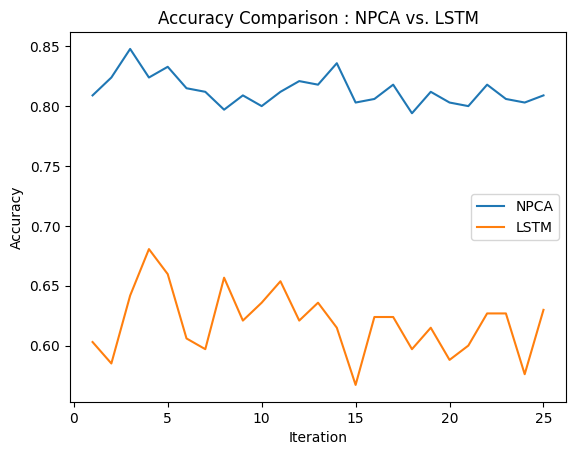

In [ ]:
num_iterations=25
iterations = range(1, num_iterations + 1)


plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison : NPCA vs. LSTM')
plt.legend()
plt.show()